In [17]:
!pip install langchain google-cloud-aiplatform google-auth > /dev/null
!pip install arxiv > /dev/null
!pip install duckduckgo-search > /dev/null
!pip install googlemaps > /dev/null
!!pip install gradio_tools > /dev/null

[]

In [1]:
from langchain.llms import VertexAI
from langchain.agents import load_tools, initialize_agent, AgentType

In [2]:
import os

os.environ['GOOGLE_APPLICATION_CREDENTIALS']='/content/generativeaitrial-trialLC.json'

In [3]:
llm = VertexAI(temperature=0.1)

tools = load_tools(
    ["arxiv"], 
)

agent_chain = initialize_agent(
    tools,
    llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True,
)

In [4]:
agent_chain.run(
    "What's the paper 1605.08386 about?",
)



> Entering new AgentExecutor chain...
I don't know what the paper 1605.08386 is about
Action: Arxiv
Action Input: 1605.08386
Observation: Published: 2016-05-26
Title: Heat-bath random walks with Markov bases
Authors: Caprice Stanley, Tobias Windisch
Summary: Graphs on lattice points are studied whose edges come from a finite set of
allowed moves of arbitrary length. We show that the diameter of these graphs on
fibers of a fixed integer matrix can be bounded from above by a constant. We
then study the mixing behaviour of heat-bath random walks on these graphs. We
also state explicit conditions on the set of moves so that the heat-bath random
walk, a generalization of the Glauber dynamics, is an expander in fixed
dimension.
Thought:I now know the final answer
Final Answer: Heat-bath random walks with Markov bases

> Finished chain.


'Heat-bath random walks with Markov bases'

In [5]:
agent_chain.run(
    "What are some papers about LLMs?",
)



> Entering new AgentExecutor chain...
I need to find some papers about LLMs
Action: Arxiv
Action Input: large language model
Observation: Published: 2022-02-07
Title: Cedille: A large autoregressive French language model
Authors: Martin Müller, Florian Laurent
Summary: Scaling up the size and training of autoregressive language models has
enabled novel ways of solving Natural Language Processing tasks using zero-shot
and few-shot learning. While extreme-scale language models such as GPT-3 offer
multilingual capabilities, zero-shot learning for languages other than English
remain largely unexplored. Here, we introduce Cedille, a large open source
auto-regressive language model, specifically trained for the French language.
Our results show that Cedille outperforms existing French language models and
is competitive with GPT-3 on a range of French zero-shot benchmarks.
Furthermore, we provide an in-depth comparison of the toxicity exhibited by
these models, showing that Cedille marks an

'Here are some papers about LLMs: Cedille: A large autoregressive French language model, How Good are Commercial Large Language Models on African Languages?, and A Precis of Language Models are not Models of Language.'

In [6]:
from langchain.utilities import ArxivAPIWrapper

arxi = ArxivAPIWrapper()

docs = arxi.run('Csaba Veres')

In [7]:
docs

'Published: 2022-05-16\nTitle: A Precis of Language Models are not Models of Language\nAuthors: Csaba Veres\nSummary: Natural Language Processing is one of the leading application areas in the\ncurrent resurgence of Artificial Intelligence, spearheaded by Artificial Neural\nNetworks. We show that despite their many successes at performing linguistic\ntasks, Large Neural Language Models are ill-suited as comprehensive models of\nnatural language. The wider implication is that, in spite of the often\noverbearing optimism about AI, modern neural models do not represent a\nrevolution in our understanding of cognition.\n\nPublished: 2022-06-15\nTitle: Large Language Models are not Models of Natural Language: they are Corpus Models\nAuthors: Csaba Veres\nSummary: Natural Language Processing (NLP) has become one of the leading application\nareas in the current Artificial Intelligence boom. Transfer learning has\nenabled large deep learning neural networks trained on the language modeling\ntas

In [8]:
from langchain.tools import ShellTool

shell_tool = ShellTool()

In [9]:
shell_tool.description = shell_tool.description + f"args {shell_tool.args}".replace("{", "{{").replace("}", "}}")

In [10]:
llm = VertexAI(temperature=0.1)
self_ask_with_search = initialize_agent([shell_tool], 
                                        llm, 
                                        agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, 
                                        verbose=True)

In [ ]:
self_ask_with_search.run("Download the medium.com webpage and grep for all urls. Return only a sorted list of them. Be sure to use double quotes.")

In [14]:
from langchain.tools import DuckDuckGoSearchRun

search = DuckDuckGoSearchRun()

search.run("Who is the managing director of Nvidia?")

/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:20: UserWarning: ddg is deprecated. Use DDGS().text() generator
  warnings.warn("ddg is deprecated. Use DDGS().text() generator")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:22: UserWarning: parameter time is deprecated, use parameter timelimit
  warnings.warn("parameter time is deprecated, use parameter timelimit")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:24: UserWarning: parameter page is deprecated, use DDGS().text() generator
  warnings.warn("parameter page is deprecated, use DDGS().text() generator")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:26: UserWarning: parameter max_results is deprecated, use DDGS().text()
  warnings.warn("parameter max_results is deprecated, use DDGS().text()")


'We intend to use our @NVIDIA Twitter account, NVIDIA Facebook page, NVIDIA LinkedIn page and company blog as a means of disclosing information about our company, our services and other matters and for complying with our disclosure obligations under Regulation FD. The information we post through these social media channels may be deemed material. We intend to use our @NVIDIA Twitter account, NVIDIA Facebook page, NVIDIA LinkedIn page and company blog as a means of disclosing information about our company, our services and other matters and for complying with our disclosure obligations under Regulation FD. The information we post through these social media channels may be deemed material. Jensen Huang founded NVIDIA in 1993 and has served since its inception as president, chief executive officer and a member of the board of ... Chris A. Malachowsky. Founder and NVIDIA Fellow. Chris Malachowsky founded NVIDIA in 1993 and has more than 40 years of industry experience. He serves as a membe

In [18]:
from gradio_tools.tools import StableDiffusionTool

In [20]:
local_file_path = StableDiffusionTool().langchain.run("""Please create a 
photo of a shark riding a skateboard""")

Loaded as API: https://gradio-client-demos-text-to-image.hf.space ✔

Job Status: Status.STARTING eta: None


In [21]:
from PIL import Image

im = Image.open(local_file_path)

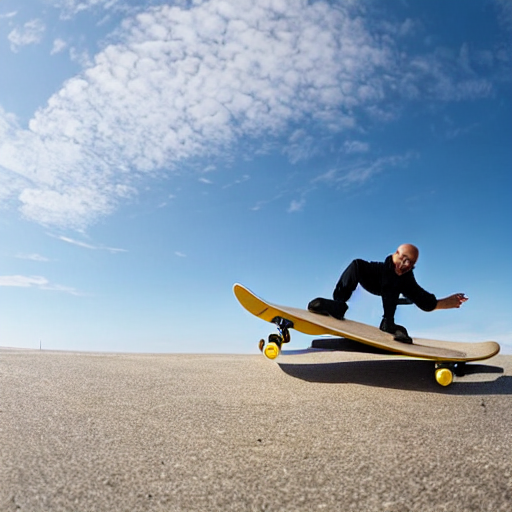

In [23]:
display(im)

gradio-tools comes with a set of pre-built tools you can leverage immediately! These include:

StableDiffusionTool - Generate an image from a given prompt using the open source stable diffusion demo hosted on HuggingFace spaces

ImageCaptionTool - Caption an image by providing a filepath based on Niels Rogge's HuggingFace Space

ImageToMusicTool - Create an audio clip that matches the style of a given image file based on Sylvain Filoni's HuggingFace Space

StableDiffusionPromptGeneratorTool - Use this tool to improve a prompt for stable diffusion and other image generators based on this HuggingFace Space

TextToVideoTool - A tool for creating short videos from text. Based on this HuggingFace Space

WhisperAudioTranscriptionTool - A tool for transcribing audio with Whisper. Based on this HuggingFace Space

ClipInterrogatorTool - A tool for reverse engineering a prompt from a source image. Based on this HuggingFace Space

DocQueryDocumentAnsweringTool - A tool for answering questions about a document from the from the image of the document. Based on this HuggingFace Space

BarkTextToSpeechTool - A tool for text-to-speech. Based on this HuggingFace Space

In [25]:
from gradio_tools import (StableDiffusionTool, 
                          ImageCaptioningTool, 
                          StableDiffusionPromptGeneratorTool,
                          TextToVideoTool,
                          ImageToMusicTool)

from langchain.agents import initialize_agent
from langchain.llms import OpenAI
from langchain.memory import ConversationBufferMemory

llm = VertexAI(temperature=0.1)
memory = ConversationBufferMemory(memory_key="chat_history")

tools = [StableDiffusionTool().langchain, ImageCaptioningTool().langchain,
         StableDiffusionPromptGeneratorTool().langchain, TextToVideoTool().langchain]


agent = initialize_agent(tools, llm, memory=memory, agent="conversational-react-description", verbose=True)

Loaded as API: https://gradio-client-demos-text-to-image.hf.space ✔
Loaded as API: https://gradio-client-demos-blip-2.hf.space ✔


ValueError: ignored

In [ ]:
output = agent.run(input=("Please create a photo of a Sky lark riding a space ship "
                          "but improve my prompt prior to using an image generator."
                          "Please caption the generated image and create a video for it using the improved prompt."))